320


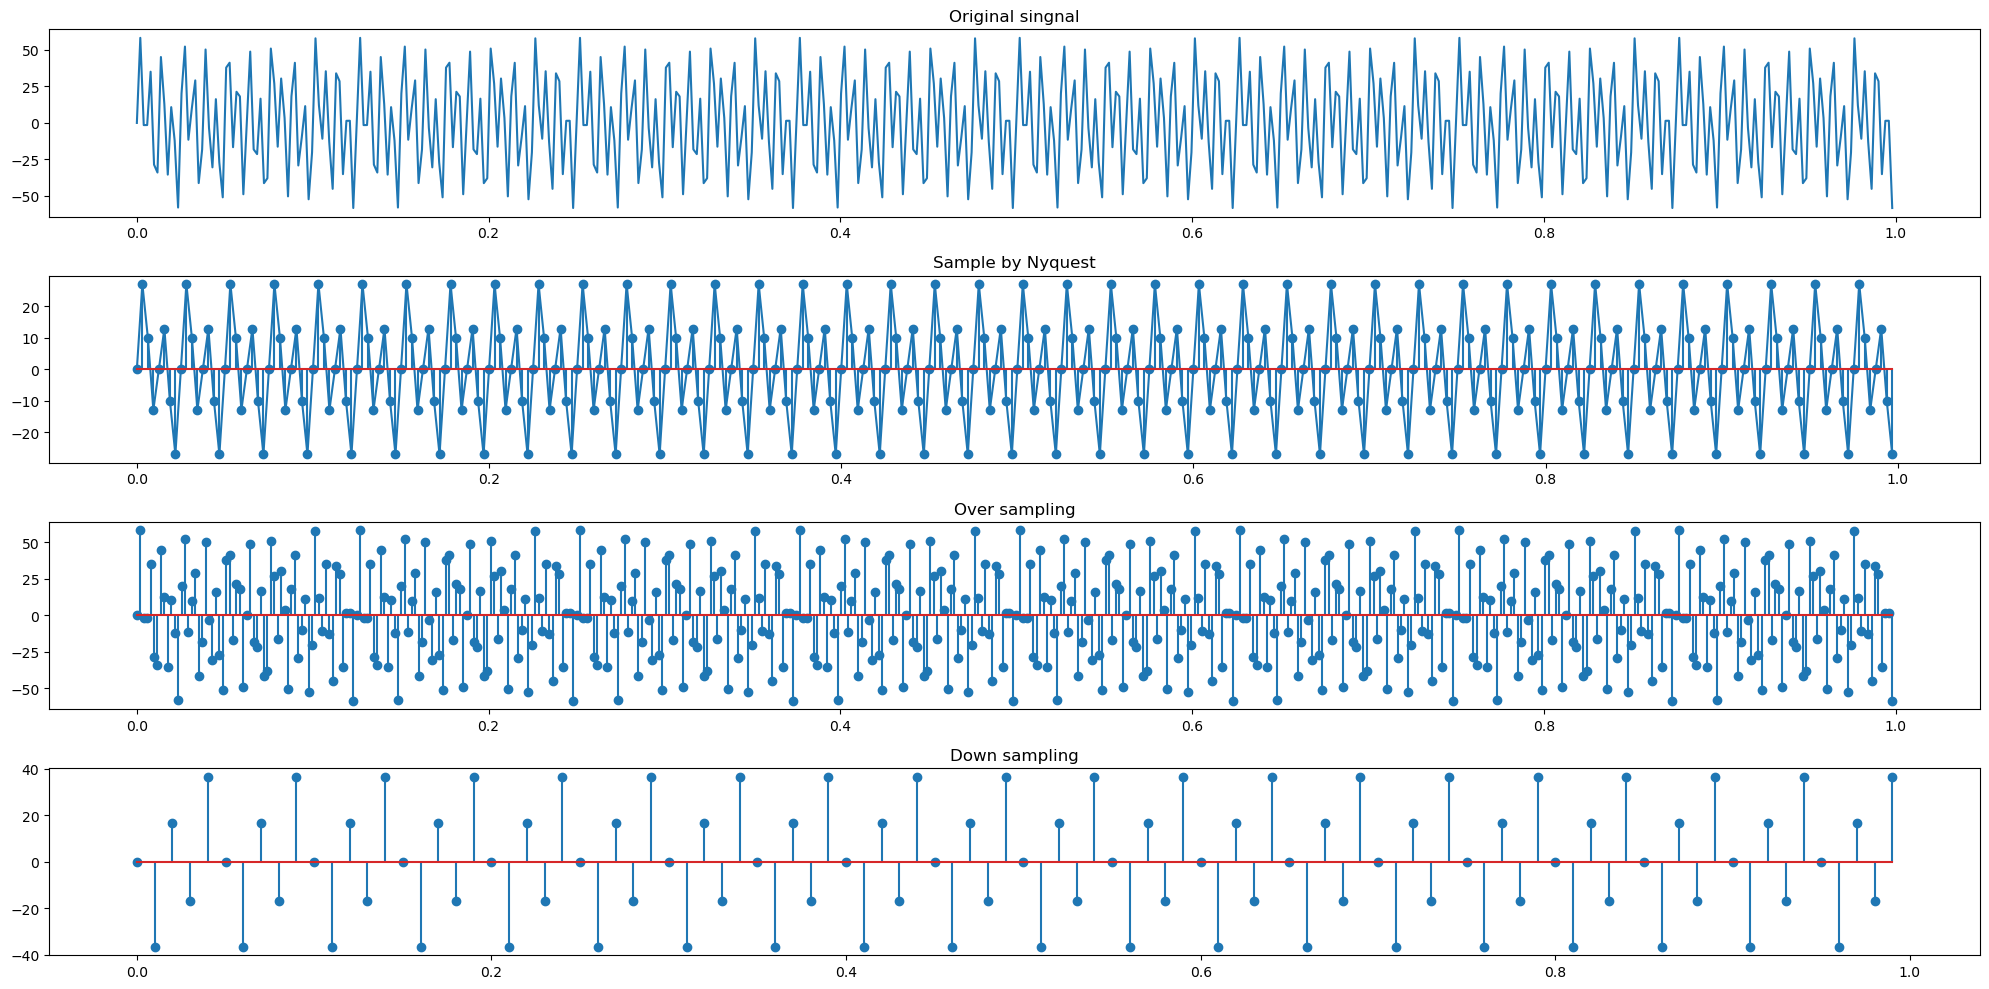

In [7]:
import numpy as np
import matplotlib.pyplot as plt


f1 = 40
f2 = 80
f3 = 160
A1 = 10
A2 = 20
A3 = 40
number_of_subgraph = 4

def orginal_generator():
    time = np.arange(0, 1, 1 / 512)
    original_signal = A1 * np.sin(2 * np.pi * f1 * time) + A2 * np.sin(2 * np.pi * f2 * time) + A3 * np.sin(2 * np.pi * f3 * time)
    return time, original_signal

def sampler(freqency_rate):
    time = np.arange(0, 1, 1 / freqency_rate)
    original_signal = A1 * np.sin(2 * np.pi * f1 * time) + A2 * np.sin(2 * np.pi * f2 * time) + A3 * np.sin(2 * np.pi * f3 * time)
    return time, original_signal

plt.figure(figsize=(20, 10))

time, original_signal = orginal_generator()
plt.subplot(number_of_subgraph, 1, 1)
plt.plot(time, original_signal)
#plt.stem(time, original_signal)
plt.title('Original singnal')

#up-sampling
time, original_signal_sample = sampler(320) #Fmx = 160, Nyquest = 2 * Fmx
print(len(original_signal_sample))
plt.subplot(number_of_subgraph, 1, 2)
plt.plot(time, original_signal_sample)
plt.stem(time, original_signal_sample, use_line_collection=True)
plt.title('Sample by Nyquest')

#over-sampling
time, original_signal_sample = sampler(512)
plt.subplot(number_of_subgraph, 1, 3)
plt.stem(time, original_signal_sample, use_line_collection=True)
plt.title('Over sampling')

#under-sampling
time, original_signal_sample = sampler(100)
plt.subplot(number_of_subgraph, 1, 4)
plt.stem(time, original_signal_sample, use_line_collection=True)
plt.title('Down sampling')

plt.tight_layout()
plt.show()




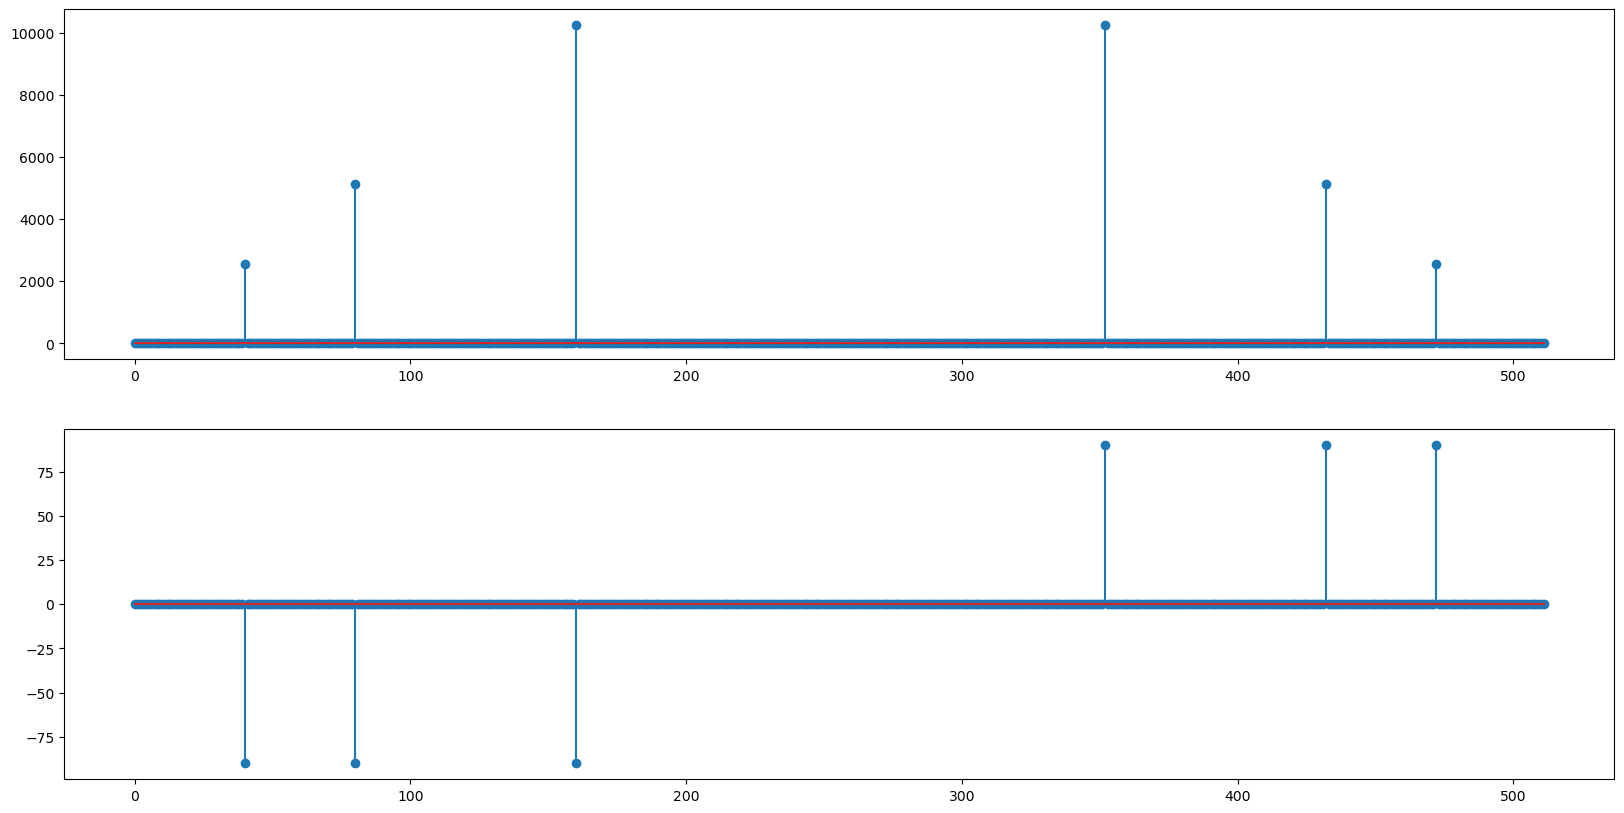

In [8]:
import numpy as np
import matplotlib.pyplot as plt


f1 = 40
f2 = 80
f3 = 160
A1 = 10
A2 = 20
A3 = 40
N = 512
number_of_subgraph = 4

def phase_spectrum(dft_values):
    phase_values = np.zeros(N)
    for i in range(N):
        theta = np.arctan2(round(dft_values[i].imag), round(dft_values[i].real))
        theta = np.degrees(theta)
        phase_values[i] = theta
    return phase_values

def dft(original_signal):
    dft_values = np.zeros(N, dtype=complex)
    for k in range(N):
        for n in range(N):
            dft_values[k] += (original_signal[n] * np.exp(-1j * 2 * np.pi * k * n / N))
    return dft_values

def original_signal_generator():
    time = np.arange(0, 1, 1 / 512)
    original_signal = A1 * np.sin(2 * np.pi * f1 * time) + A2 * np.sin(2 * np.pi * f2 * time) + A3 * np.sin(2 * np.pi * f3 * time)
    return time, original_signal

time, original_signal = original_signal_generator()
dft_values = dft(original_signal)
plt.figure(figsize=(20, 10))
plt.subplot(2, 1, 1)
plt.stem(np.abs(dft_values))

phase_values = phase_spectrum(dft_values)
plt.subplot(2, 1, 2)
plt.stem(phase_values)

plt.show()